# Second Stage

In [1]:
import sys
sys.path.append('..')
from get_data import *
from simulation import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import tqdm

In [2]:
target_code = '0050'
all_df = get_one_file(stock_code=target_code, year_month='202201')
df_dict = {k: v.reset_index(drop=True) for k, v in all_df.groupby('date')}

2022-11-06 14:43:29.384 | INFO     | get_data.py         :  109 | /Users/anthonywah/Projects/mafs6100-order-placement-strategy/data/0050/0050_md_202201_202201.csv.gz - Got 653582 entries - 19.61s


---

### 1. Count cases of spread in specific (2) ticks

In [3]:
t2_all_df = all_df.loc[all_df['spread_in_tick'] == 2, :].reset_index(drop=True)
log_info(f'{len(t2_all_df)}/{len(all_df)} experiments to be considered')

2022-11-06 14:43:29.913 | INFO     | 2002807760.py       :    2 | 166190/653582 experiments to be considered


Actual number of experiments may not be equal to this number since some of the quotes are consecutive (happens one after another). We only consider cases where tick changes to 2 and stays til either:

    - Order got filled at at b_1 before t_m
    - Replaced order at b_1 with b_star at t_m, and got filled at b_star at t_m < t < t_start
    - Replace order at b_1 with b_star at t_m, and waited til t_star, and then cross the spread, fill at a_1

---

### 2. Simulation

In [4]:
date = '2022-01-03'
side = 'bid'

In [5]:
sim_df = sim_one_day_t2(date, target_code, side, 10, 5, 0, save=False, verbose=True)

2022-01-03:Simulation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37488/37488 [00:03<00:00, 10730.98it/s]
2022-11-06 14:43:33.475 | INFO     | simulation.py       :  146 | Done Simulation on 2022-01-03 - 653 results from 37488 quotes - 3.548s


In [6]:
sim_df.loc[sim_df['eoq_rep']]

,date,make_price,fill_price,case,eoq_rep,duration,pnl,start_ts,start_index,start_price,...,start_ask,replace_ts,replace_index,replace_p,replace_bid,replace_ask,fill_ts,fill_index,fill_bid,fill_ask
0,2022-01-03,14610.0,14630.0,TAKE,True,10000.0,-13.689254,1.641200e+12,15,14605.0,...,14615.0,1.641200e+12,48,14610.0,14615.0,14625.0,1.641200e+12,75,14620.0,14630.0
1,2022-01-03,14625.0,14640.0,TAKE,True,10000.0,-10.256410,1.641200e+12,76,14620.0,...,14630.0,1.641200e+12,91,14625.0,14625.0,14630.0,1.641200e+12,100,14625.0,14640.0
7,2022-01-03,14620.0,14630.0,TAKE,True,10000.0,-6.839945,1.641200e+12,195,14615.0,...,14625.0,1.641200e+12,208,14620.0,14625.0,14630.0,1.641200e+12,214,14625.0,14630.0
8,2022-01-03,14625.0,14630.0,TAKE,True,10000.0,-3.418803,1.641201e+12,222,14620.0,...,14630.0,1.641201e+12,243,14625.0,14625.0,14635.0,1.641201e+12,253,14625.0,14630.0
11,2022-01-03,14640.0,14640.0,EOQREP,True,8896.0,-0.000000,1.641201e+12,423,14635.0,...,14645.0,1.641201e+12,428,14640.0,14640.0,14645.0,1.641201e+12,432,14635.0,14640.0
18,2022-01-03,14655.0,14660.0,TAKE,True,10000.0,-3.411805,1.641201e+12,892,14650.0,...,14660.0,1.641201e+12,910,14655.0,14655.0,14660.0,1.641201e+12,916,14655.0,14660.0
20,2022-01-03,14660.0,14670.0,TAKE,True,10000.0,-6.821282,1.641201e+12,1127,14655.0,...,14665.0,1.641201e+12,1135,14660.0,14660.0,14665.0,1.641201e+12,1147,14655.0,14670.0
24,2022-01-03,14665.0,14675.0,TAKE,True,10000.0,-6.818957,1.641201e+12,1258,14660.0,...,14670.0,1.641201e+12,1273,14665.0,14670.0,14675.0,1.641201e+12,1284,14670.0,14675.0
31,2022-01-03,14660.0,14665.0,TAKE,True,10000.0,-3.410641,1.641201e+12,1657,14655.0,...,14665.0,1.641201e+12,1667,14660.0,14660.0,14665.0,1.641201e+12,1691,14660.0,14665.0
33,2022-01-03,14665.0,14680.0,TAKE,True,10000.0,-10.228435,1.641201e+12,1904,14660.0,...,14670.0,1.641201e+12,1949,14665.0,14665.0,14675.0,1.641201e+12,1988,14670.0,14680.0


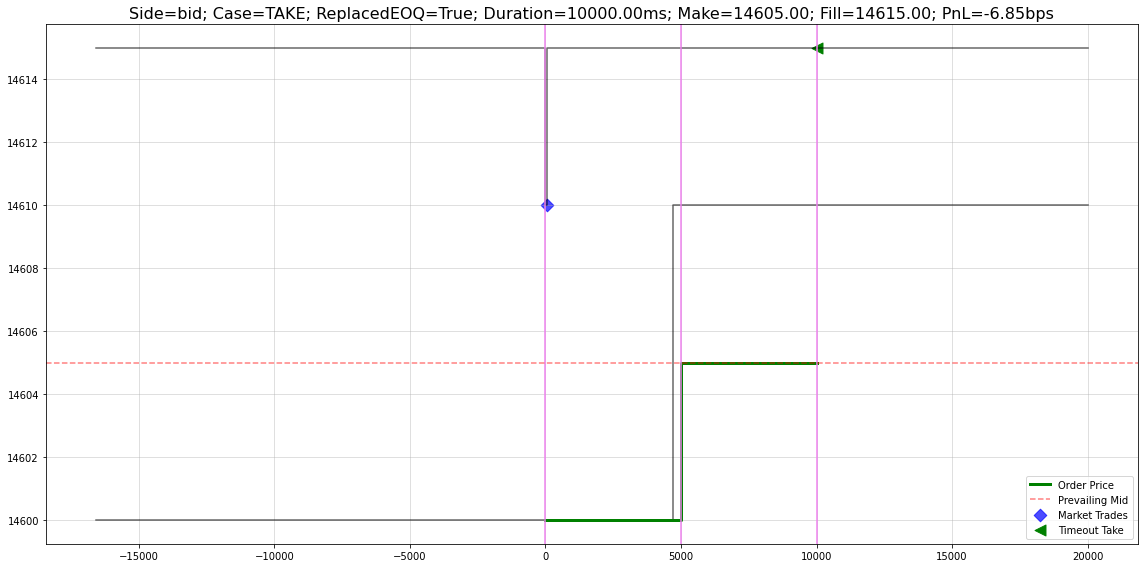

{'date': '2022-01-03', 'make_price': 14605.0, 'fill_price': 14615.0, 'case': 'TAKE', 'eoq_rep': True, 'duration': 10000.0, 'pnl': -6.846970215679562, 'start_ts': 1641210507554.0, 'start_index': 25694, 'start_price': 14600.0, 'start_bid': 14600.0, 'start_ask': 14610.0, 'replace_ts': 1641210512554.0, 'replace_index': 25706, 'replace_p': 14605.0, 'replace_bid': 14610.0, 'replace_ask': 14615.0, 'fill_ts': 1641210517554.0, 'fill_index': 25719, 'fill_bid': 14610.0, 'fill_ask': 14615.0}


In [10]:
# Demonstrate one simulation

df = df_dict.get(date).copy()
row = sim_df.loc[379]
res = plot_one_sim(day_df=df, ts=10, tm=5, side=side, row=row)
print(row.to_dict())

In [11]:
res

,date,time,lastPx,size,volume,SP1,BP1,mid,w_mid,spread,...,tick_size,spread_in_tick,dt_time_str,dt_str,dt,dt_ms,intv,order_price,sim_row,t
25684,2022-01-03,114810961,NaN,NaN,5017,14615.0,14600.0,14607.5,14611.250000,15.0,...,5.0,3.0,11:48:10.961000,2022-01-03 11:48:10.961000,2022-01-03 11:48:10.961000000,1.641210e+12,2095.0,NaN,False,-16593.0
25685,2022-01-03,114811661,NaN,NaN,5017,14615.0,14600.0,14607.5,14611.250000,15.0,...,5.0,3.0,11:48:11.661000,2022-01-03 11:48:11.661000,2022-01-03 11:48:11.661000000,1.641210e+12,700.0,NaN,False,-15893.0
25686,2022-01-03,114813713,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:13.713000,2022-01-03 11:48:13.713000,2022-01-03 11:48:13.713000000,1.641210e+12,2052.0,NaN,False,-13841.0
25687,2022-01-03,114816876,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:16.876000,2022-01-03 11:48:16.876000,2022-01-03 11:48:16.876000000,1.641210e+12,3163.0,NaN,False,-10678.0
25688,2022-01-03,114818385,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:18.385000,2022-01-03 11:48:18.385000,2022-01-03 11:48:18.385000000,1.641210e+12,1509.0,NaN,False,-9169.0
25689,2022-01-03,114818392,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:18.392000,2022-01-03 11:48:18.392000,2022-01-03 11:48:18.392000000,1.641210e+12,7.0,NaN,False,-9162.0
25690,2022-01-03,114820709,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:20.709000,2022-01-03 11:48:20.709000,2022-01-03 11:48:20.709000000,1.641211e+12,2317.0,NaN,False,-6845.0
25691,2022-01-03,114820716,NaN,NaN,5017,14615.0,14600.0,14607.5,14614.745763,15.0,...,5.0,3.0,11:48:20.716000,2022-01-03 11:48:20.716000,2022-01-03 11:48:20.716000000,1.641211e+12,7.0,NaN,False,-6838.0
25692,2022-01-03,114821219,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:21.219000,2022-01-03 11:48:21.219000,2022-01-03 11:48:21.219000000,1.641211e+12,503.0,NaN,False,-6335.0
25693,2022-01-03,114821220,NaN,NaN,5017,14615.0,14600.0,14607.5,14613.333333,15.0,...,5.0,3.0,11:48:21.220000,2022-01-03 11:48:21.220000,2022-01-03 11:48:21.220000000,1.641211e+12,1.0,NaN,False,-6334.0


---

### 3. Simulation over all on 1 set of parameters and calculate score

In [ ]:
target_code = '0050'
all_df = get_one_stock_data(stock_code=target_code)
df_dict = {k: v.reset_index(drop=True) for k, v in all_df.groupby('date')}

In [ ]:
# 1 set of params
i_ts, i_tm = 5, 1
side = 'bid'

In [ ]:
# Multiprocessing
params_ls = [[one_df, target_code, side, i_ts, i_tm, False] for d, one_df in df_dict.items()]
st = datetime.datetime.now()
log_info(f'Start simulation on {len(params_ls)} days')
sim_df = pd.concat(pool_run_func(sim_one_day_t2, params_ls)).reset_index(drop=True)
log_info(f'Done simulation - {(datetime.datetime.now() - st).total_seconds():.2f}s')

In [ ]:
sim_df = sim_df.loc[sim_df['duration'] > 0, :].reset_index(drop=True)
sim_df.loc[:, 'duration'] /= 1000
sim_df.loc[:, 'score'] = sim_df[['pnl', 'duration']].apply(lambda x: obj(x[0], x[1]), axis=1)

In [ ]:
filt_cond = sim_df['score'] < 50

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(sim_df.loc[filt_cond, 'score'], bins=100, label='score')
ax.grid(True)
ax.set_title('Score', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(sim_df.loc[filt_cond, 'duration'], sim_df.loc[filt_cond, 'pnl'], label='Result')
ax.grid(True)
ax.set_title('PnL - Duration Plot', fontsize=14)
fig.tight_layout()
plt.show()

---